# IMT 3860 - Introducción a Data Science

# Taller 1: Inferencia Estadística.

#### <u> Fecha de entrega: xx de abril 2022, 23:59.<u>


## 1. Introducción.

En DS, recolectamos y evaluamos datos para obtener conclusiones, aplicando para ello diversas técnicas de analisis. Algunas de estas conclusiones o descubrimientos pueden describirse fácilmente usando tablas y gráficos, lo que conocemos como **estadística descriptiva**. En muchos otros casos, necesitamos explorar una cantidad o variable *no observada* a partir de los datos disponibles, y estimar ciertos parámetros de una población a partir de una muestra representativa. En este caso, recurrimos a la **inferencia estadística**.



El proceso de inferencia estadística concierne al desarrollo de procesos, métodos y teoremas que nos permiten extraer significado e información de data generada por procesos estocásticos (aleatorios).



Tenemos una muestra de una población, y podemos calcular estadísticas descriptivas para ellas. ¿Pero son representativas de la población completa?
No podemos predecir valores absolutos para otras muestras o mediciones, pero podemos hablar en el lenguaje de probabilidades.

El objetivo de la inferencia estadística, es obtener conclusiones probabilísticas sobre los resultados que esperamos si volvemos  tomar los mismos datos.





## 2. Caso de Estudio: Análisis de Votaciones Presidenciales en EEUU 2020.


### 2.1 Descripción del Dataset.

Los datos para este problema correspoden a los resultados de las elecciones presidenciales 2020 de EEUU (Biden vs. Trump), a nivel de condados. Además, se incluyen algunas variables sociodemográficos y resultados de elecciones anteriores.

Estos datos pueden ser visualizados en el siguiente mapa de USA Today:

https://www.usatoday.com/in-depth/graphics/2020/11/10/election-maps-2020-america-county-results-more-voters/6226197002/


### 2.2 Objetivo.

Analizar el comportamiento de distintos estados y condados en las elecciones presidenciales estadounidenses 2020. Por ejemplo, algunas preguntas que podríamos responder a partir de los datos son:

- ¿Cómo se distribuyen los condados donde ganó la opción demócrata (Biden) o republicana (Trump)?
- ¿En qué se parecen/diferencian?
- ¿Hay correlaciones entre el porcentaje de voto demócrata (o republicano) y otras variables políticas o sociodemográficas?
- ¿Es el comportamiento de un condado o estado, predictor de otro?
- ¿Hay similitudes entre los swing states?

## 3. Desarrollo.



In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### 3.1 Lectura de Datos.

La librería Pandas implemente métodos de lectura de distintos tipos de datos, entre ellos datos en formato `csv`, mediante la función `read_csv`:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dat=pd.read_csv('/content/drive/MyDrive/MIA/IMT3860 - Introducción a Data Science/Clase 3/county_election_results.csv')

In [4]:
dat

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2000,votes_2004,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,9559,10520,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,15092,16693,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,20285,24135,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,11756,12875,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11103,12269,11693,10859,12040,NaN,NaN,2197,9466,1.043854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,56041,100,0,2020-11-03,FIPSCode,presidential,WY,R,7496,...,7418,8081,8418,8539,8470,NaN,NaN,1202,6154,1.102479
3108,3108,56003,100,0,2020-11-03,FIPSCode,presidential,WY,R,4806,...,4918,5283,5341,5324,5317,NaN,NaN,604,4067,1.074666
3109,3109,56023,100,0,2020-11-03,FIPSCode,presidential,WY,R,8643,...,6845,7914,8615,8618,8875,NaN,NaN,1105,6779,1.170704
3110,3110,56031,100,0,2020-11-03,FIPSCode,presidential,WY,R,3898,...,4373,4574,4597,4531,4529,NaN,NaN,719,3437,1.082358


Esta función almacena los datos en una estructura tipo DataFrame, que podemos explorar usando los métodos y atributos descritos en:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html



In [5]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3112 non-null   int64  
 1   FIPS                        3112 non-null   int64  
 2   eevp                        3112 non-null   int64  
 3   electTotal                  3112 non-null   int64  
 4   electionDate                3112 non-null   object 
 5   level                       3112 non-null   object 
 6   office                      3112 non-null   object 
 7   state                       3112 non-null   object 
 8   winner                      3112 non-null   object 
 9   votes_R_2020                3112 non-null   int64  
 10  votes_D_2020                3112 non-null   int64  
 11  votes_third_party_2020      3112 non-null   int64  
 12  votes_total_2020            3112 non-null   int64  
 13  export_time                 3112 

### 3.2 Análisis Exploratorio.


Analicemos en primer lugar la distribución de condados donde se impuso Biden. Para ello, creamos una nueva columna con el porcentaje de votos demócratas por condado. 

#### 3.2.1 Análisis Gráfico.

Una primera forma de explorar esta información, es mediante un análisis exploratorio gráfico.

`Funciones de interés:`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html




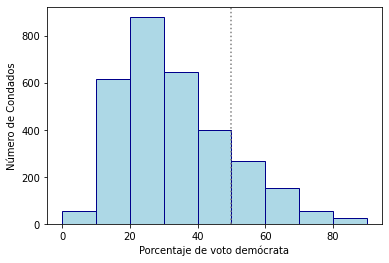

In [7]:
dat['pct_D']=dat['votes_D_2020']/dat['votes_total_2020']*100
#histograma
fig=plt.figure()
ax=fig.add_subplot(111)

bins=np.arange(0,100,10)
n,bins,patches=ax.hist(dat['pct_D'],bins=bins,histtype='bar',ec='darkblue',fc='lightblue')
ax.set_xlabel('Porcentaje de voto demócrata')
ax.set_ylabel('Número de Condados')
ax.axvline(x=50,ls=':',color='gray')

De acuerdo al gráfico, la primera conclusión es que más condados de EEUU votaron por Trump, que por el actual presidente Biden.¿Cómo se explica entonces la victoria demócrata?

In [8]:
counties_D=dat[dat['pct_D']>=50.0]
counties_R=dat[dat['pct_D']<50.0]
print(len(counties_R),len(counties_D),len(dat))

2599 513 3112


**Binning bias.**

Lo histogramas son informativos y permiten entender las características genelares de nuestros datos, pero la gran desventaja, es que los mismos datos pueden interpretarse de distinta forma dependiendo de la elección de bins. La elección del número de bins es arbitraria, lo cual puede generar sesgos (binning bias). Adicionalmente, en un histograma no estamos graficando todos los datos, sino que los agrupamos en bins, y por lo tanto perdemos sus valores. Una regla común es usar un número de bins igual a la raíz cuadrada del número de muestras.

55


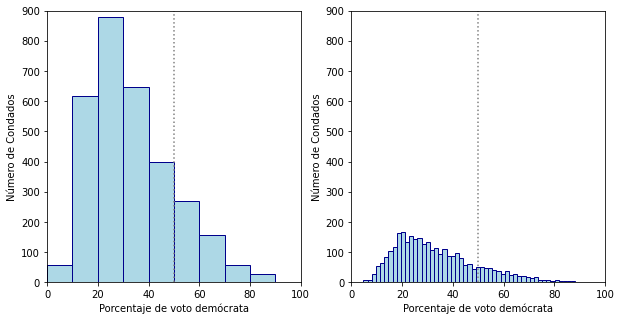

In [9]:
#Notar las diferencias de binning
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

bins=np.arange(0,100,10)
nbins=int(np.sqrt(len(dat)))
print(nbins)
_=ax1.hist(dat['pct_D'],bins=bins,histtype='bar',ec='darkblue',fc='lightblue')
_=ax2.hist(dat['pct_D'],bins=nbins,histtype='bar',ec='darkblue',fc='lightblue')

for ax in [ax1,ax2]:
    ax.set_xlabel('Porcentaje de voto demócrata')
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50,ls=':',color='gray')
    ax.set_ylim(0,900)
    ax.set_xlim(0,100)


Para evitar sesgos de bias y pérdidas de infomración al agrupar los datos, una buena alternativa de exploración gráfica es la **función de distribución acumulada empírica (FDAe)**, donde:
- `Eje x:`la cantidad medida
- `Eje y:` fracción de datos que tienen un valor menor al correspondiente valor `x`.

Para construirla, ordenamos los datos `x`, y construimos un vector `y` de la siguiente forma:

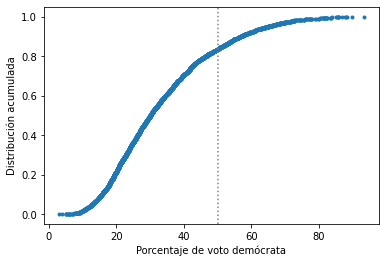

In [10]:
n=len(dat)
x=np.sort(dat['pct_D'])
y=np.arange(1,len(x)+1)/len(x)

plt.plot(x,y,marker='.',ls='none')
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

Podemos decir por ejemplo, que aproximadamente el 80% de los condados fue ganado por el candidato republicano, ya que tienen un porcentaje de voto demócrata menor al 50%.

La FDAe también es útil para comparar distribuciones. Por ejemplo, podemos comparar las distribuciones en los estados que definieron la elección del 2020: Arizona, Pensylvannia, Michigan, Georgia y Wisconsin.

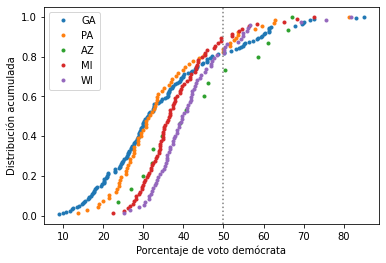

In [11]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

swing=['GA','PA','AZ','MI','WI',]

for state in swing:
    dats=dat[dat['state']==state]
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=state)
    plt.legend()
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

¿Qué estados tienen mayores y menores fracciones de condados ganados por Biden?

#### 3.2.2 Estadísticas de Resumen.

Los histogramas y FDAe entregan un resumen efectivo de los datos, pero puede ser de utilidad resumirlos aún más en algunas estadísticas numéricas, como por ejemplo: 

- **Media** (`np.mean()`): es la suma de todos los valores, dividida por el número de puntos.
 
$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad. 
 
- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$


In [12]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

Covarianza: 1529.2228630936759
Correlacion de Pearson: 0.7003677095910197


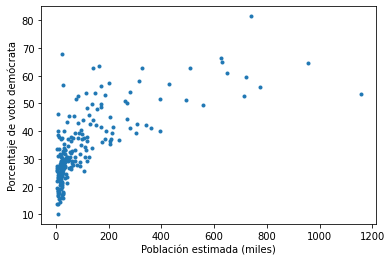

In [13]:
#Análisis de covarianza: % votos demócratas y cantidad total de votantes en swing states
swing=['PA','OH','FL']

dat_swing=dat[dat['state'].isin(swing)]

x=dat_swing['votes_total_2020']/1000
y=dat_swing['pct_D']

cov=np.cov(x,y)
print('Covarianza:',cov[0,1])

pearson=np.corrcoef(x,y)
print('Correlacion de Pearson:',pearson[0,1])

#scatter plot:
_=plt.plot(x,y,'.')
_=plt.xlabel('Población estimada (miles)')
_=plt.ylabel('Porcentaje de voto demócrata')

### 3.3 Estimación de Parámetros.

Supongamos un caso muy simple, en que podemos modelar la relación entre dos variables mediante una regresión lineal de la forma:

$$ y=ax+b $$

donde $a$ y $b$ son parámetros a estimar.

Por ejemplo, podemos modelar la relación entre el porcentaje de voto demócrata, y la cantidad total de votos por condado

Slope:0.051, Intercept:28.189


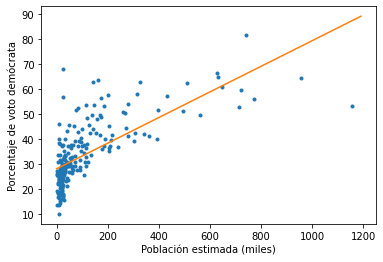

In [14]:
a,b=np.polyfit(x,y,1)
xf=np.arange(0,1200,10)
yf=a*xf+b

_=plt.plot(x,y,'.')
_=plt.plot(xf,yf,'-')

_=plt.xlabel('Población estimada (miles)')
_=plt.ylabel('Porcentaje de voto demócrata')

print('Slope:%.3f, Intercept:%.3f'%(a,b))

### 3.4 Boostrapping.
 
Veamos primero cómo generar remuestreos y réplicas de bootstrapping usando `numpy.random`. Para ello, consideremos los datos de fracción de voto demócrata para todos los condados de EEUU, y su distribución acumulada.

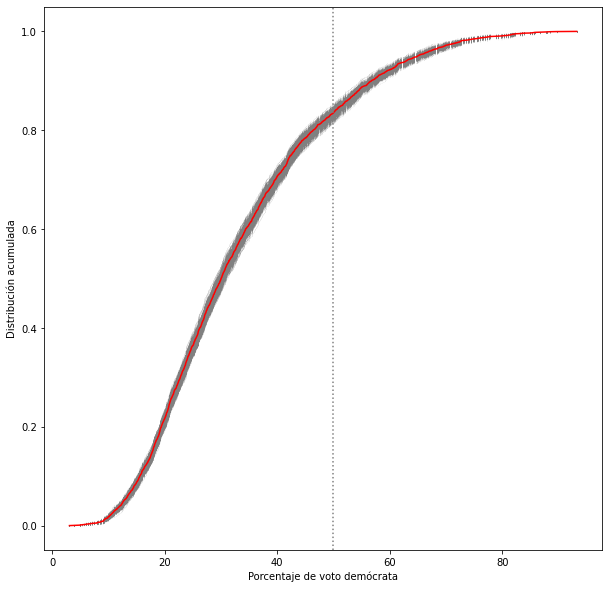

In [15]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

nsamples=1000
xb=dat['pct_D']
plt.figure(figsize=(10,10))

for ns in range(nsamples):
    bs_sample=np.random.choice(xb,size=len(xb))
    x, y = fdae(bs_sample)
    _ = plt.plot(x, y, marker='.', markersize=0.2,linestyle='none',color='gray', alpha=0.1)
    

x, y = fdae(xb)
_ = plt.plot(x, y, '-', color='red')
 
    
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')


### Bootstrap no paramétrico.

Suponga ahora que por alguna inesperada razón, el candidato perdedor logra anular al elección, y ésta tiene que repetirse (bajo las mismas condiciones iniviales). ¿Qué podemos decir del resultado esperado para esta nueva "medición", a partir de los qué fracción de los condados serían ganados por demócratas si repetimos la elección bajo las mismas condiciones?

0.1648457583547558
IC (95%): [0.15263496 0.17802057]


(0.0, 110.0)

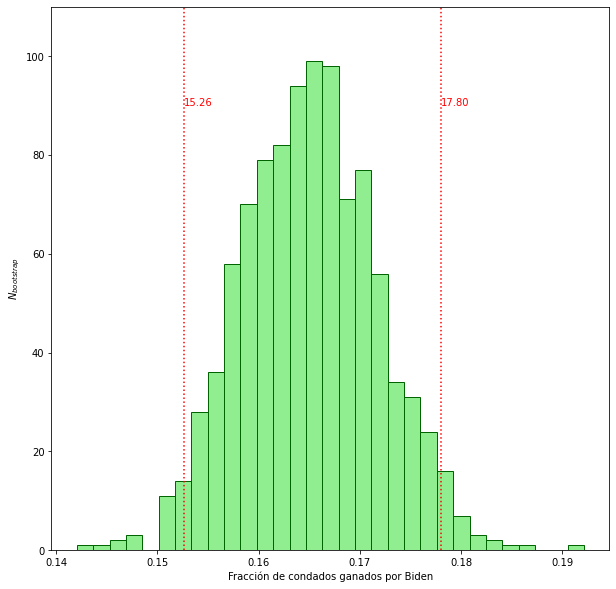

In [16]:
#qué fracción de los condados serían ganados por demócratas si repetimos la elección bajo las mismas condiciones?

nsamples=1000
xb=dat['pct_D']

#estadistica promedio para los datos
counties_D=xb[xb>=50.0]
frac_D=len(counties_D)/len(dat)
print(frac_D)
plt.figure(figsize=(10,10))

frac_D_b=np.empty(nsamples)
for ns in range(nsamples):
    bs_sample=np.random.choice(xb,size=len(xb))
    counties_D_b=bs_sample[bs_sample>=50.0]
    frac_D_b[ns]=len(counties_D_b)/len(bs_sample)


_ = plt.hist(frac_D_b,bins=int(np.sqrt(nsamples)),ec='darkgreen',fc='lightgreen')
 
    
IC=np.percentile(frac_D_b, [2.5, 97.5])
                 
print('IC (95%):',IC)     

plt.xlabel('Fracción de condados ganados por Biden')
plt.ylabel(r'$N_{bootstrap}$')
#plt.axvline(x=frac_D,ls='--',color='k')
plt.axvline(x=IC[0],ls=':',color='r')
plt.axvline(x=IC[1],ls=':',color='r')
plt.text(IC[0],90,'%.2f'%(IC[0]*100),color='r',fontsize=10)
plt.text(IC[1],90,'%.2f'%(IC[1]*100),color='r',fontsize=10)

#plt.fill_betweenx([0,110],0.14,IC[0],alpha=0.2,color='r')
#plt.fill_betweenx([0,110],IC[1],0.2,alpha=0.2,color='r')
plt.ylim(0,110)


A partir de los resultados de la votación del 3/11/2020, podemos *inferir* que si la elección se repitiera (en las mismas condiciones), Biden ganaría entre un 15.1% y 17.7% de los condados, con 95% de confiabilidad.


### 3.5 Boostrapping de a Pares e Intervalos de Confiabilidad.

¿Qué pasaría si repetimos la elección, bajo las mismas condiciones? ¿Cómo cambiarían los parámetros de la función lineal estimada en el punto 3.3 (% de voto demócrata vs. total de votos en FL, OH y PA)? 

Usando bootstrapping, podemos obtener intervalos de confiabilidad para $a, b$: generamos colecciones de pares de datos, y obtenemos la distribución de los parámetros obtenidos.

a: IC (95%): [0.0402072  0.06632367]
b: IC (95%): [26.4505308  29.71278836]


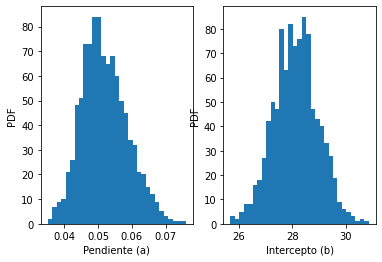

In [17]:
x=dat_swing['votes_total_2020']/1000
y=dat_swing['pct_D']
x=x.to_numpy()
y=y.to_numpy()
#Indices
inds=np.arange(len(x))

#numero de muestras
size=1000 

# Initializar replicas: bs_slope_reps, bs_intercept_reps
bs_slope_reps = np.empty(size)
bs_intercept_reps = np.empty(size)

# Generar replicates
for i in range(size):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x, bs_y = x[bs_inds], y[bs_inds]
    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

print('a: IC (95%):',np.percentile(bs_slope_reps, [2.5, 97.5]))     
print('b: IC (95%):',np.percentile(bs_intercept_reps, [2.5, 97.5]))     
  
# Plot the histogram

f, (ax1, ax2) = plt.subplots(1, 2)

nbins=int(np.sqrt(size))
ax1.hist(bs_slope_reps, bins=nbins)#, normed=True)
ax1.set_xlabel('Pendiente (a)')
ax1.set_ylabel('PDF')

ax2.hist(bs_intercept_reps, bins=nbins)#, normed=True)
ax2.set_xlabel('Intercepto (b)')
ax2.set_ylabel('PDF')

plt.show()


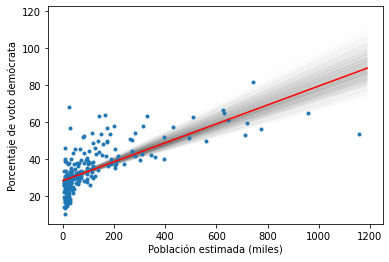

In [18]:
xf=np.arange(0,1200,10)
for a,b in zip(bs_slope_reps,bs_intercept_reps):
    plt.plot(xf,a*xf+b,lw=0.1,alpha=0.1,color='gray')
    
_=plt.plot(x,y,'.')
_=plt.plot(xf,yf,'-',color='red')

_=plt.xlabel('Población estimada (miles)')
_=plt.ylabel('Porcentaje de voto demócrata')

### 3.6 Testeo de Hipótesis.

En el análisis anterior, asumimos un modelo lineal para la generación de datos, y estimamos los parámetros del modelo junto con sus intervalos de confiabilidad. Pero, ¿cómo evaluamos si el modelo es una descripción razonable de los datos?.

Por ejemplo, supongamos la siguiente hipótesis: **dos estados vecinos como Michigan y Wisconsin, tienen la misma distribución de probabilidad de votos a nivel de condado.**
 
Esta es nuestra **hipótesis nula**, y tenemos datos para testearla. En concreto, necesitamos evaluar qué tan razonables son los datos observados, asumiendo que la hipótesis es verdadera.

Podemos comenzar, por comparar la distribución acumulada y estadísticas de resumen para cada estado.

MI, mean:38.78, median:36.57, std:9.62, len:83
WI, mean:42.03, median:39.97, std:10.31, len:72


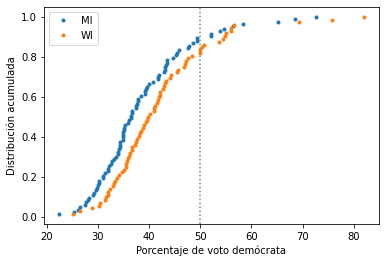

In [19]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

test=['MI','WI']

for state in test:
    dats=dat[dat['state']==state]
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=state)
    plt.legend()
    print('%s, mean:%.2f, median:%.2f, std:%.2f, len:%.d'%(state,dats['pct_D'].mean(),dats['pct_D'].median(),dats['pct_D'].std(),len(dats['pct_D'])))
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

In [20]:
diff_mean=42.03-38.78
diff_median=39.97-36.46
diff_std=10.31-9.62
print(diff_mean,diff_median,diff_std)

3.25 3.509999999999998 0.6900000000000013


¿Es suficiente este análisis para llegar a una conclusión?

Para testear la hipóetsis, podemos simular cómo serían los datos observados si las tendencias de voto en ambos estados estuvieran idénticamente distribuidas.

Para ello, reordenamos los datos de manera que los datos de MI y WI son indistinguibles entre sí. Es decir, como si provinieran de una única población, donde el estado no importa. Esto se denomina `permutaciones`, y está implementado en la siguiente función:

https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html

Luego, etiquetamos los primeros datos como 'MI', y los siguientes como 'WI', y calculamos su distribución.

83 72


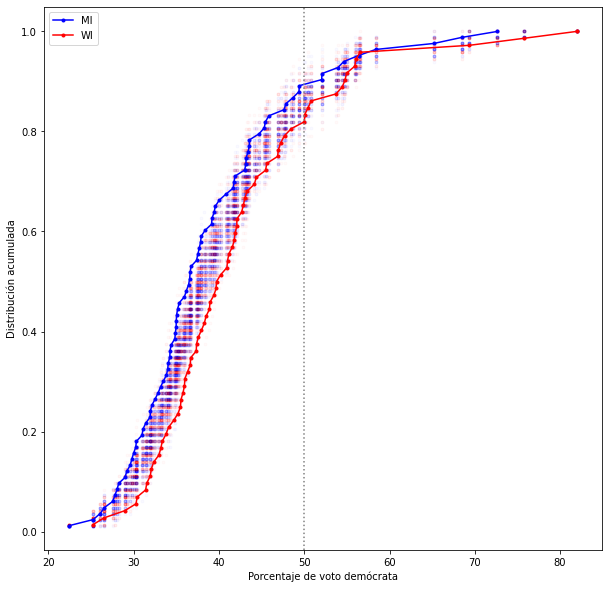

In [21]:
def permutation_sample(data1, data2):
    """Generar una permutacion de dos datasets"""

    #datos concatenados
    data = np.concatenate((data1, data2))

    # permutacion
    permuted_data = np.random.permutation(data)

    #muestras permutadas
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


#datos por estado
pct_D_MI=dat[dat['state']=='MI']['pct_D']
pct_D_WI=dat[dat['state']=='WI']['pct_D']
print(len(pct_D_MI),len(pct_D_WI))
#generamos n permutaciones
nperm=100
plt.figure(figsize=(10,10))
for n in range(nperm):
    perm1,perm2=permutation_sample(pct_D_MI,pct_D_WI)
    x,y=fdae(perm1)
    plt.plot(x,y,marker='.',ls='none',color='blue',alpha=0.02)
    
    x,y=fdae(perm2)
    plt.plot(x,y,marker='.',ls='none',color='red',alpha=0.02)

#graficamos las distribuciones originales de cada estado
x,y=fdae(pct_D_MI)
plt.plot(x,y,marker='.',ls='-',label='MI',color='blue')

x,y=fdae(pct_D_WI)
plt.plot(x,y,marker='.',ls='-',label='WI',color='red')
plt.legend()

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')


Ahora que sabemos cómo simular la hipótesis nula usando permutaciones, podemos testearla. Ello implica evaluar si los datos observados son consistentes asumiendo que la hipótesis es verdadera. ¿Cómo hacemos esto cuantitativamente?

Para evaluar la hipótesis, necesitamos una **estadística de prueba**. Es decir, una cantidad que podemos calcular a partir de las observaciones, y de los datos simulados bajo la hipótesis nula. Esta estadística tiene que ser pertinente a la hipótesis que estamos testeando.

En este caso, la hipotésis nula es: 
> $H_0$: los dos estados (WI y MI) tienen la misma distribución de voto demócrata. 

Es decir, su media debería ser idéntica, o *la diferencia entre sus medias* debería ser 0. Por lo tanto, elegimos como estadística de prueba esta diferencia.

Luego, para evaluar si la estadística de prueba (en este caso, la diferencia entre medias) observada es consistente con la hipótesis nula, analizamos la distribución de réplicas y calculamos el **valor-p**.

> El valor p se define como la probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta. En términos simples, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos.

Si el valor p cumple con la condición de ser menor que un nivel de significancia impuesto arbitrariamente, este se considera como un resultado estadísticamente significativo y, por lo tanto, permite *rechazar la hipótesis nula*. Típicamente, se rechaza la hipótesis nula cuando $p<0.05$.


![imagen.png](attachment:imagen.png)



Observed mean difference:-3.26
valor-p = 0.0196


Text(0, 0.5, 'N')

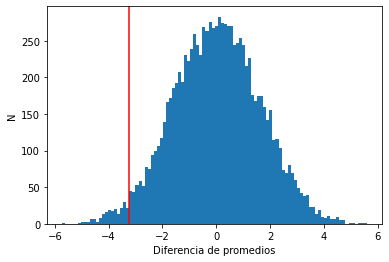

In [22]:
def perm_reps(data_1, data_2, size=1):
    """Generate multiples replicas de la diferencia media para las permutaciones."""

    # Initializar arreglo dereplicas
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generar permutacion
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = perm_sample_1.mean()-perm_sample_2.mean()

    return perm_replicates

#observaciones (MI-WI)
obs_diff=pct_D_MI.mean()-pct_D_WI.mean()

print(r'Observed mean difference:%.2f'%obs_diff)

#permutaciones
nperm=10000
perm_replicates =perm_reps(pct_D_MI,pct_D_WI, size=nperm)

#valor-p
pval=np.sum(perm_replicates<=obs_diff)/len(perm_replicates)
print('valor-p =', pval)

_=plt.hist(perm_replicates,bins=100)
_=plt.axvline(x=obs_diff,color='r',label='Observed difference')
plt.xlabel('Diferencia de promedios')
plt.ylabel('N')

El valor p obtenido indica que hay sólo un 2.2% de probabilidad de obtener las diferencia media observada (3.26%) bajo la hipótesis nula de que las distribuciones de voto demócrata en MI y WI son equivalentes. Es decir, **se rechaza la hipótesis nula**: MI y WI *no* tienen una diferencia de media significativamente igual a 0, por lo tanto sus distribuciones no son similares.

## 4. Trabajo Individual

**1.** Elija dos estados de EEUU, y compare la distribución de votos republicanos y demócratas a través de estadísticas descriptivas. Elabore también un gráfico de caja, y comente sobre las similitudes y diferencias que puede inferir a partir del análisis exploratorio gráfico y cuantitativo.<br>


**2.** A partir de los datos entregados, estudie la posible correlación entre la fracción de votos republicanos (o demócratas) y alguna otras de las variables incluidas en la base de datos. Puede trabajar con todos los estados, o con alguna selección de ellos. Para este estudio, se requiere:<br>

a) Explorar y proponer una posible correlación o relación analítica entre variables.<br>
b) Plantear una hipótesis que refleje esta correlación.<br>
c) Diseñar y realizar el test de hipótesis.<br>
d) Concluir acerca de la validez y significancia de la correlación identificada.<br>

**3.** Imagine que ud. trabaja en una empresa de e-commerce, que está testeando un nuevo diseño de página web. El objetivo es lograr un aumento en la tasa de conversión (porcentaje de usuarios que realiza una compra) de al menos un 2%.

Para el testeo, se diseña un experimento en base a dos grupos:

> Grupo control (A): se les muestra la página original.

> Grupo de tratamiento (B): se les muestra el nuevo diseño. 

Para cada grupo, se monitorea la actividad en la página web y se asigna una tasa de conversión de acuerdo a la siguiente regla: 

    0 - El usuario no compró el producto durante la sesión en la página web. 
    1 - El usuario si compró el producto durante la sesión en la página web. 

El experimento se desarrolla durante un mes, y para cada día se reporta la tasa de conversión promedio de cada grupo. Los datos están contenidos en el archivo `abtest.csv`.

Para este caso, diseñe e implemente un testeo A/B que permita determinar si el diseño de la nueva página es o no efectivo.

1. Respuesta:

Escojí los estados de Orlando y New YOrk (OR, NY resp.)


Se ve en las graficas de NY y OR, que hay mayor consistencia en los republicanos, que tiene menos huecos que los democratas. Esto quiere decir que votaron más por los republicanos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00aed66c10>,
      dtype=object)

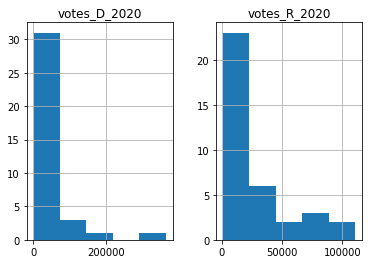

In [48]:
dat.loc[dat.state.isin(['OR']),['votes_D_2020','votes_R_2020']].hist(bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00aebbca90>,
      dtype=object)

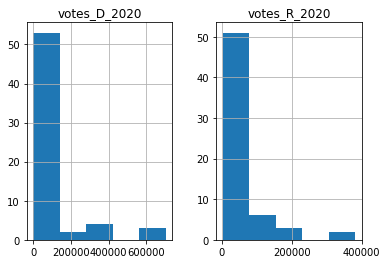

In [49]:
dat.loc[dat.state.isin(['NY']),['votes_D_2020','votes_R_2020']].hist(bins=5)

Al igual que el histograma, en el boxplox, se puede ver que hay mas votos por los republicanos consistente mente, ya que los democratas tienen mas outliers.

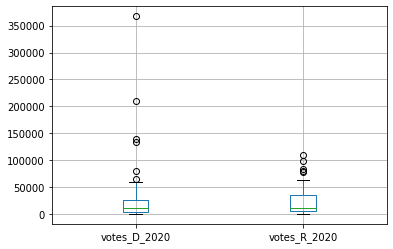

In [43]:
dat.loc[dat.state.isin(['OR']),['votes_D_2020','votes_R_2020']].boxplot()

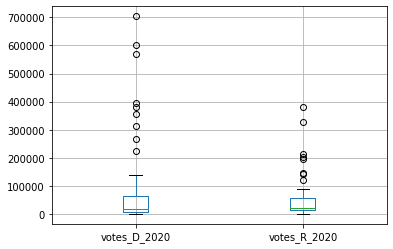

In [44]:
dat.loc[dat.state.isin(['NY']),['votes_D_2020','votes_R_2020']].boxplot()

2 a) 

In [55]:
dat1=dat.loc[dat.state.isin(['OR','NY'])].eval(
'''
pct_D = 100*votes_D_2020/votes_total_2020
pct_R = 100*votes_R_2020/votes_total_2020
'''
)
dat1.loc[dat.state.isin(['OR','NY'])].corr()['pct_D'].dropna()

Unnamed: 0                   -0.225263
FIPS                         -0.220542
votes_R_2020                  0.449380
votes_D_2020                  0.675269
votes_third_party_2020        0.636357
votes_total_2020              0.634324
acs_pct_pop_nonwhite          0.599027
acs_pct_management            0.589652
acs_pct_service               0.055364
pct_pop25+_bachelor_higher    0.778132
median_household_income       0.467889
per_capita_income             0.565046
POPESTIMATE2019               0.630218
deaths                        0.502104
deaths_per_thousand           0.471586
deaths_percap_pctile          0.397598
cases                         0.527429
cases_per_thousand            0.239935
cases_percap_pctile           0.290354
case_pct_change              -0.157247
Labor Force                   0.631866
Employment                    0.634380
Unemployment                  0.593628
Unemployment Rate             0.544915
pct_2000_dem                  0.874434
pct_2000_gre             

Se puede ver por la correlacion, que la fraccion democrata __pct_D__ tiene alta correlacion entre las pct de los años anteriores democratas y una alta correlacion negativa con las pct republicana.

b) Como se puede apreciar en la siguiente grafica, escoji la pct_2016_dem, que tiene una alta correlacion con pct_D (0.985982).

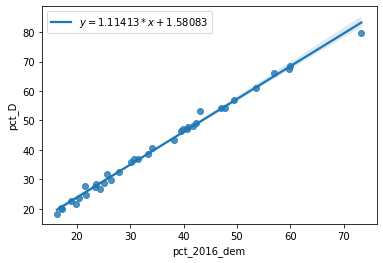

In [60]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

X=dat1.loc[dat.state.isin(['OR']),["pct_2016_dem","pct_D"]]
slope, intercept, r_value, pv, se = stats.linregress(X["pct_2016_dem"],X["pct_D"])
sns.regplot(x="pct_2016_dem", y="pct_D", data=X, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})

plt.legend()

Como la pendiente de la grafica anterior es 1.11413, que es casi un valor de 1

a: IC (95%): [1.08163122 1.15991626]
b: IC (95%): [0.11098617 2.79182193]


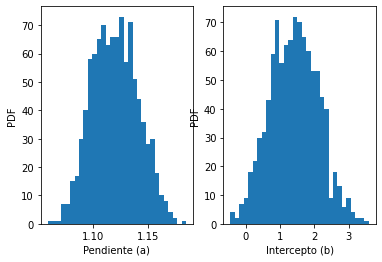

In [62]:
x=X["pct_2016_dem"].to_numpy()
y=X["pct_D"].to_numpy()
#Indices
inds=np.arange(len(x))

#numero de muestras
size=1000 

# Initializar replicas: bs_slope_reps, bs_intercept_reps
bs_slope_reps = np.empty(size)
bs_intercept_reps = np.empty(size)

# Generar replicates
for i in range(size):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x, bs_y = x[bs_inds], y[bs_inds]
    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

print('a: IC (95%):',np.percentile(bs_slope_reps, [2.5, 97.5]))     
print('b: IC (95%):',np.percentile(bs_intercept_reps, [2.5, 97.5]))     
  
# Plot the histogram

f, (ax1, ax2) = plt.subplots(1, 2)

nbins=int(np.sqrt(size))
ax1.hist(bs_slope_reps, bins=nbins)#, normed=True)
ax1.set_xlabel('Pendiente (a)')
ax1.set_ylabel('PDF')

ax2.hist(bs_intercept_reps, bins=nbins)#, normed=True)
ax2.set_xlabel('Intercepto (b)')
ax2.set_ylabel('PDF')

plt.show()

Con un intervalo de confianza de la pendiente: [1.08163122 1.15991626]

pct_2016_dem, mean:40.66, median:37.80, std:15.93, len:36
pct_D, mean:40.66, median:37.80, std:15.93, len:36


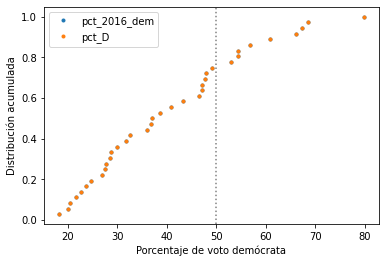

In [61]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

test=["pct_2016_dem","pct_D"]

for state in test:
    dats=X
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=state)
    plt.legend()
    print('%s, mean:%.2f, median:%.2f, std:%.2f, len:%.d'%(state,dats['pct_D'].mean(),dats['pct_D'].median(),dats['pct_D'].std(),len(dats['pct_D'])))
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

Pareciera que los datos tienen la misma distribucion, pero en la siguiente grafica se aprecia que se acepta la hipotesis nula $H_0$, ya que el p-values es de 6%.

Observed mean difference:-5.58
valor-p = 0.060735


Text(0, 0.5, 'N')

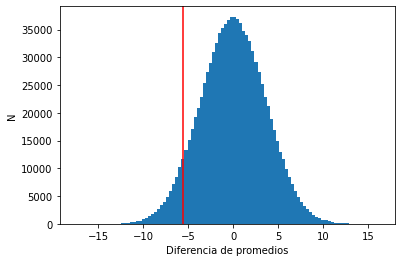

In [64]:
def perm_reps(data_1, data_2, size=1):
    """Generate multiples replicas de la diferencia media para las permutaciones."""

    # Initializar arreglo dereplicas
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generar permutacion
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = perm_sample_1.mean()-perm_sample_2.mean()

    return perm_replicates
    
obs_diff=X.pct_2016_dem.mean()-X.pct_D.mean()

print(r'Observed mean difference:%.2f'%obs_diff)

#permutaciones
nperm=100000
perm_replicates =perm_reps(X.pct_2016_dem,X.pct_D, size=nperm)

#valor-p
pval=np.sum(perm_replicates<=obs_diff)/len(perm_replicates)
print('valor-p =', pval)

_=plt.hist(perm_replicates,bins=100)
_=plt.axvline(x=obs_diff,color='r',label='Observed difference')
plt.xlabel('Diferencia de promedios')
plt.ylabel('N')

d) Se puede concluir que las proporciones de democratas entre el año 2016 y año 2020, son significativamente parecidas, ya que tienen una igual distribucion de sus medias y tienen una pendiente entre las 2 variables, de valor casi 1.

3 Respuesta

In [65]:
dat=pd.read_csv('/content/drive/MyDrive/MIA/IMT3860 - Introducción a Data Science/Clase 3/ab_data.csv')

In [71]:
A=dat.loc[dat.landing_page=='old_page']#,'converted'].sum()
B=dat.loc[dat.landing_page=='new_page']
A.converted.sum()/B.converted.sum()

1.0137730026288718

In [78]:
import numpy as np
np.corrcoef(A.converted.values,B.converted.values)

array([[ 1.00000000e+00, -4.58860334e-04],
       [-4.58860334e-04,  1.00000000e+00]])

Como se puede ver de los datos la relacion entre los datos es 1,0137730026288718, por lo que compraron con la pagina vieja y la nueva pagina, es practicamente la misma cantidad de personas. Tambien se ve que no tienen ninguna correlacion entre ambos datos (-4,58860334e-04).

Observed mean difference:0.00
valor-p = 0.9166


Text(0, 0.5, 'N')

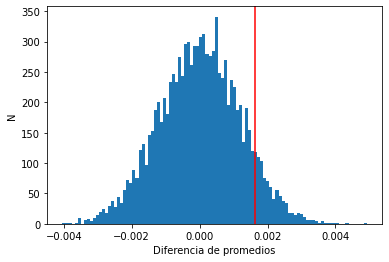

In [81]:
def perm_reps(data_1, data_2, size=1):
    """Generate multiples replicas de la diferencia media para las permutaciones."""

    # Initializar arreglo dereplicas
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generar permutacion
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = perm_sample_1.mean()-perm_sample_2.mean()

    return perm_replicates
    
obs_diff=A.converted.mean()-B.converted.mean()

print(r'Observed mean difference:%.2f'%obs_diff)

#permutaciones
nperm=10000
perm_replicates =perm_reps(A.converted,B.converted, size=nperm)

#valor-p
pval=np.sum(perm_replicates<=obs_diff)/len(perm_replicates)
print('valor-p =', pval)

_=plt.hist(perm_replicates,bins=100)
_=plt.axvline(x=obs_diff,color='r',label='Observed difference')
plt.xlabel('Diferencia de promedios')
plt.ylabel('N')

Se puede ver ademas, que la diferencia de las medias es 0, y que el p-valor es de 0.9166, por lo que se acepta la hipotesis nula $H_0$, que ambas distribucciones son iguales por lo que no aumenta la cantidad de compra con la nueva pagina web.